In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
train = pandas.read_csv(r'C:\Users\dell\OneDrive\Desktop\training_data.csv')
train[['word','nFix','FFD','GPT','TRT','fixProp']]

,word,nFix,FFD,GPT,TRT,fixProp
0,Carlucci,28.397566,4.642973,6.190631,10.343594,94.117647
1,was,12.981744,3.534385,5.263977,4.565348,76.470588
2,deputy,25.152130,5.809781,9.926357,9.145251,100.000000
3,defense,20.283976,5.261551,8.092455,8.359293,88.235294
4,secretary,17.849899,4.135982,4.507129,5.686066,88.235294
...,...,...,...,...,...,...
15731,and,11.494253,3.326575,6.183489,3.807691,72.222222
15732,patient,23.754789,5.230420,7.826157,8.412660,100.000000
15733,wife,18.390805,3.674811,8.611980,6.669187,77.777778
15734,of,14.559387,4.380448,11.890443,6.114758,77.777778


In [3]:
train_features = train[['nFix','FFD','GPT','TRT','fixProp']]

In [4]:
for i in range(len(train['word'])):
    if  '.<EOS>' in train['word'][i]:
        train['word'][i] = train['word'][i].replace(".<EOS>","")

<ipython-input-4-7ff7a04c26cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['word'][i] = train['word'][i].replace(".<EOS>","")


In [5]:
train['word']

0         Carlucci
1              was
2           deputy
3          defense
4        secretary
           ...    
15731          and
15732      patient
15733         wife
15734           of
15735        Homer
Name: word, Length: 15736, dtype: object

In [6]:
#Data Exploration and Visualization

In [7]:
print('Number of Fixations- Max : %.2f , Min : %.2f '% (max(train['nFix']), min(train['nFix'])) )
print('First Fixation Duration- Max : %.2f , Min : %.2f '% (max(train['FFD']), min(train['FFD'])) )
print('Go Past Time- Max : %.2f , Min : %.2f '% (max(train['GPT']), min(train['GPT'])) )
print('Total Reading Time- Max : %.2f , Min : %.2f '% (max(train['TRT']), min(train['TRT'])) )
print('Fixation Proportion- Max : %.2f , Min : %.2f '% (max(train['fixProp']), min(train['fixProp'])) )

Number of Fixations- Max : 100.00 , Min : 0.00 
First Fixation Duration- Max : 12.24 , Min : 0.00 
Go Past Time- Max : 100.00 , Min : 0.00 
Total Reading Time- Max : 39.59 , Min : 0.00 
Fixation Proportion- Max : 100.00 , Min : 0.00 


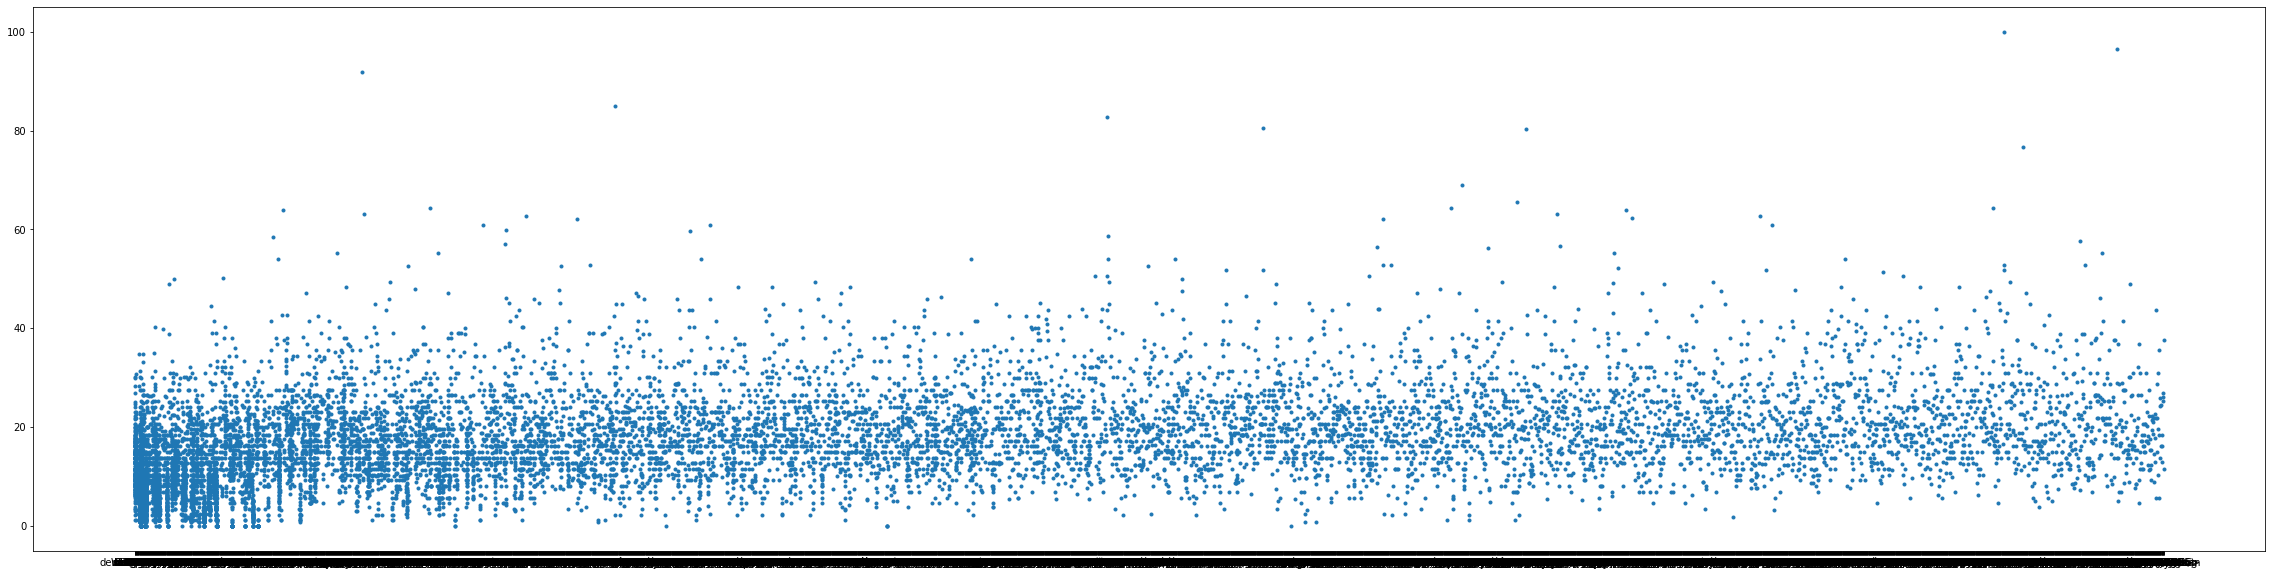

In [12]:
fig, ax = plt.subplots(figsize=(40, 10))
ax.scatter(train['word'],train['nFix'],marker = ".")
plt.show()

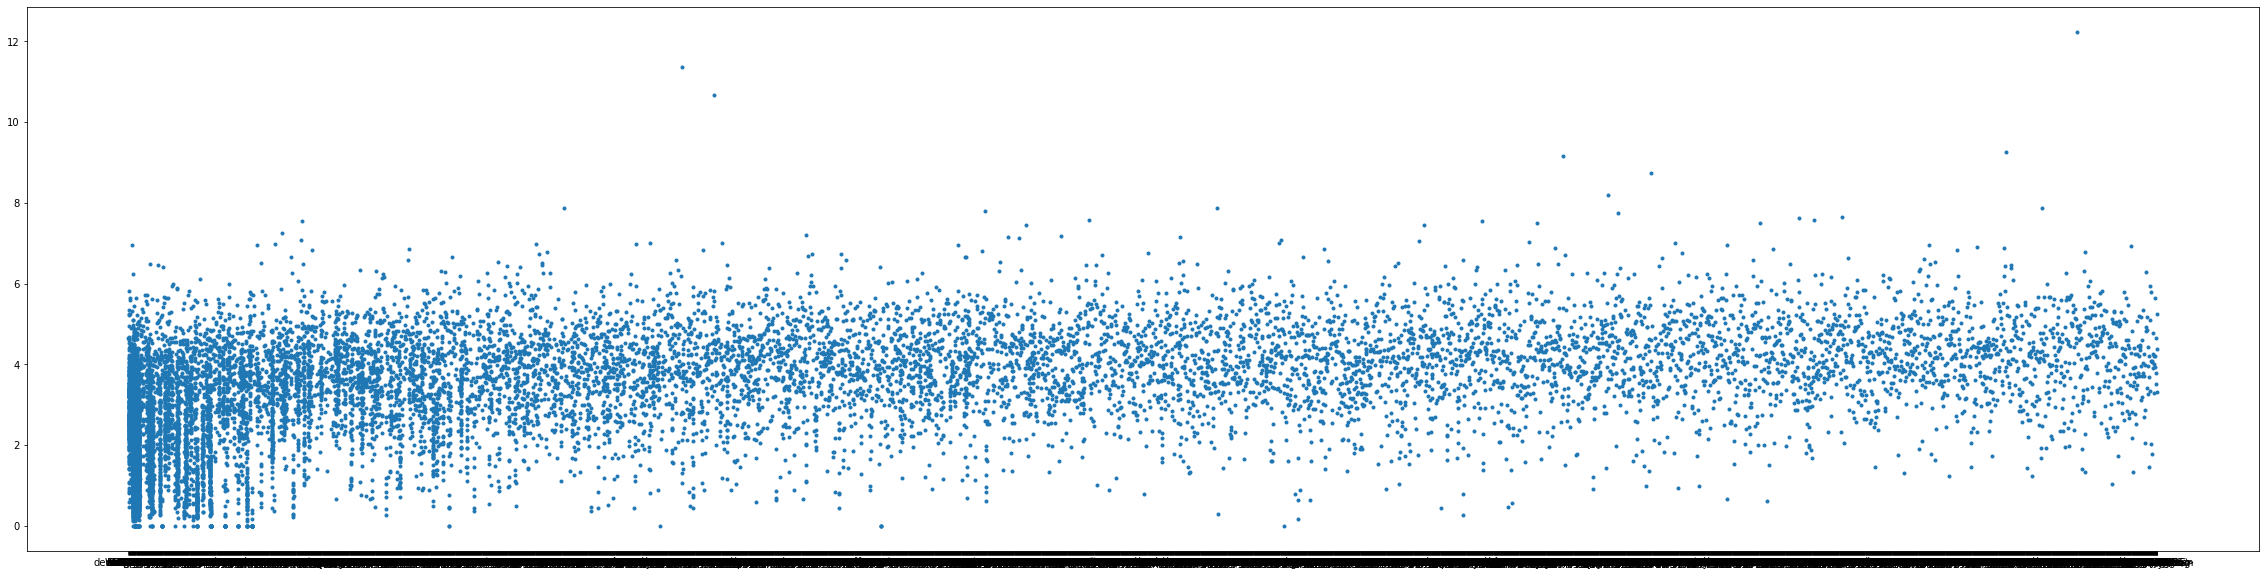

In [13]:
fig, ax = plt.subplots(figsize=(40, 10))
ax.scatter(train['word'],train['FFD'],marker = ".")
plt.show()

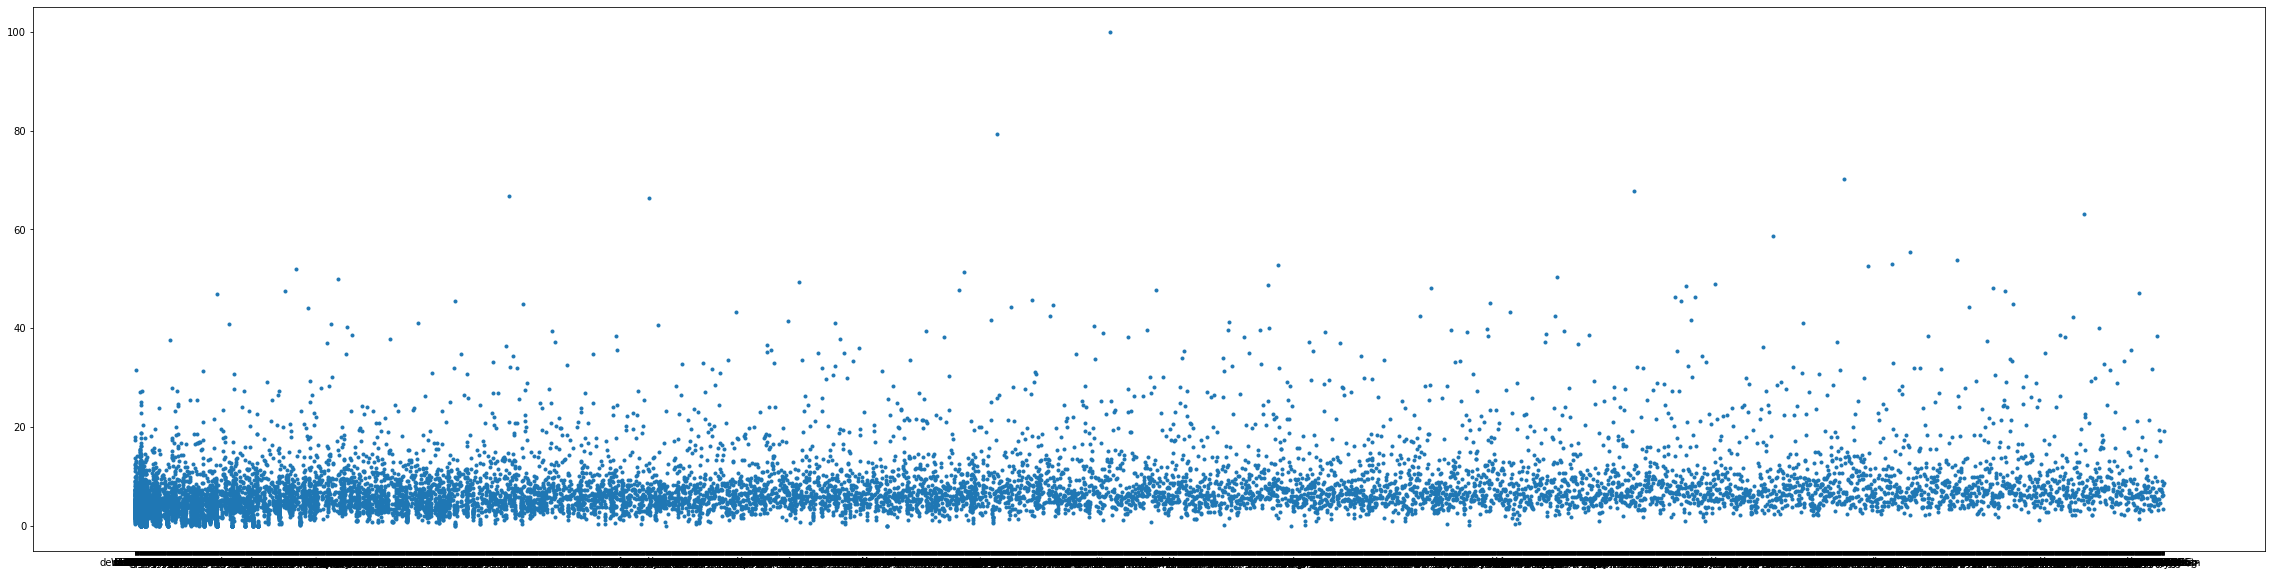

In [15]:
fig, ax = plt.subplots(figsize=(40, 10))
ax.scatter(train['word'],train['GPT'],marker = ".")
plt.show()

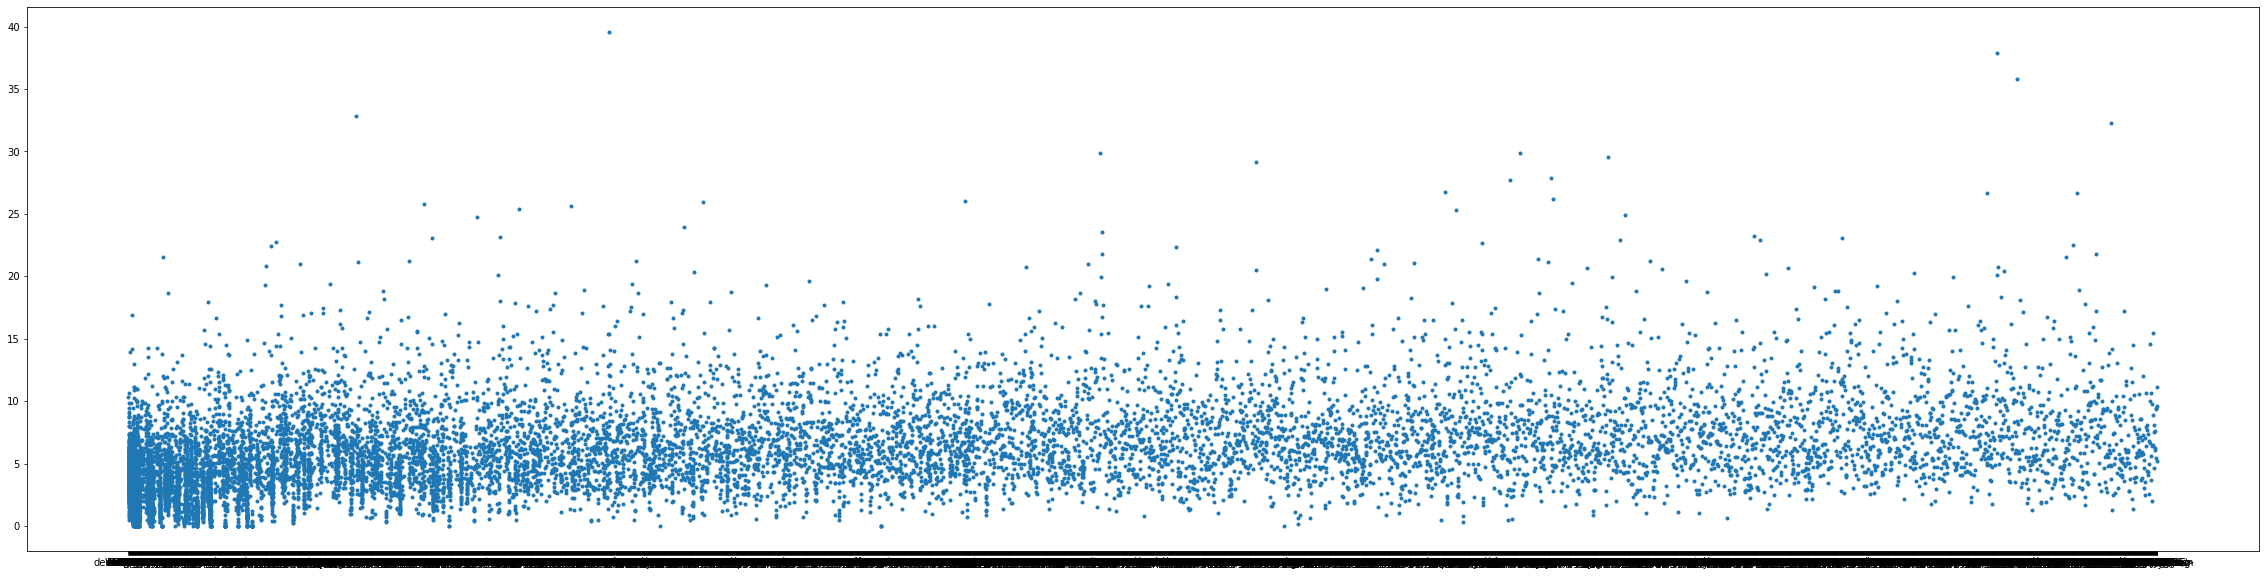

In [16]:
fig, ax = plt.subplots(figsize=(40, 10))
ax.scatter(train['word'],train['TRT'],marker = ".")
plt.show()

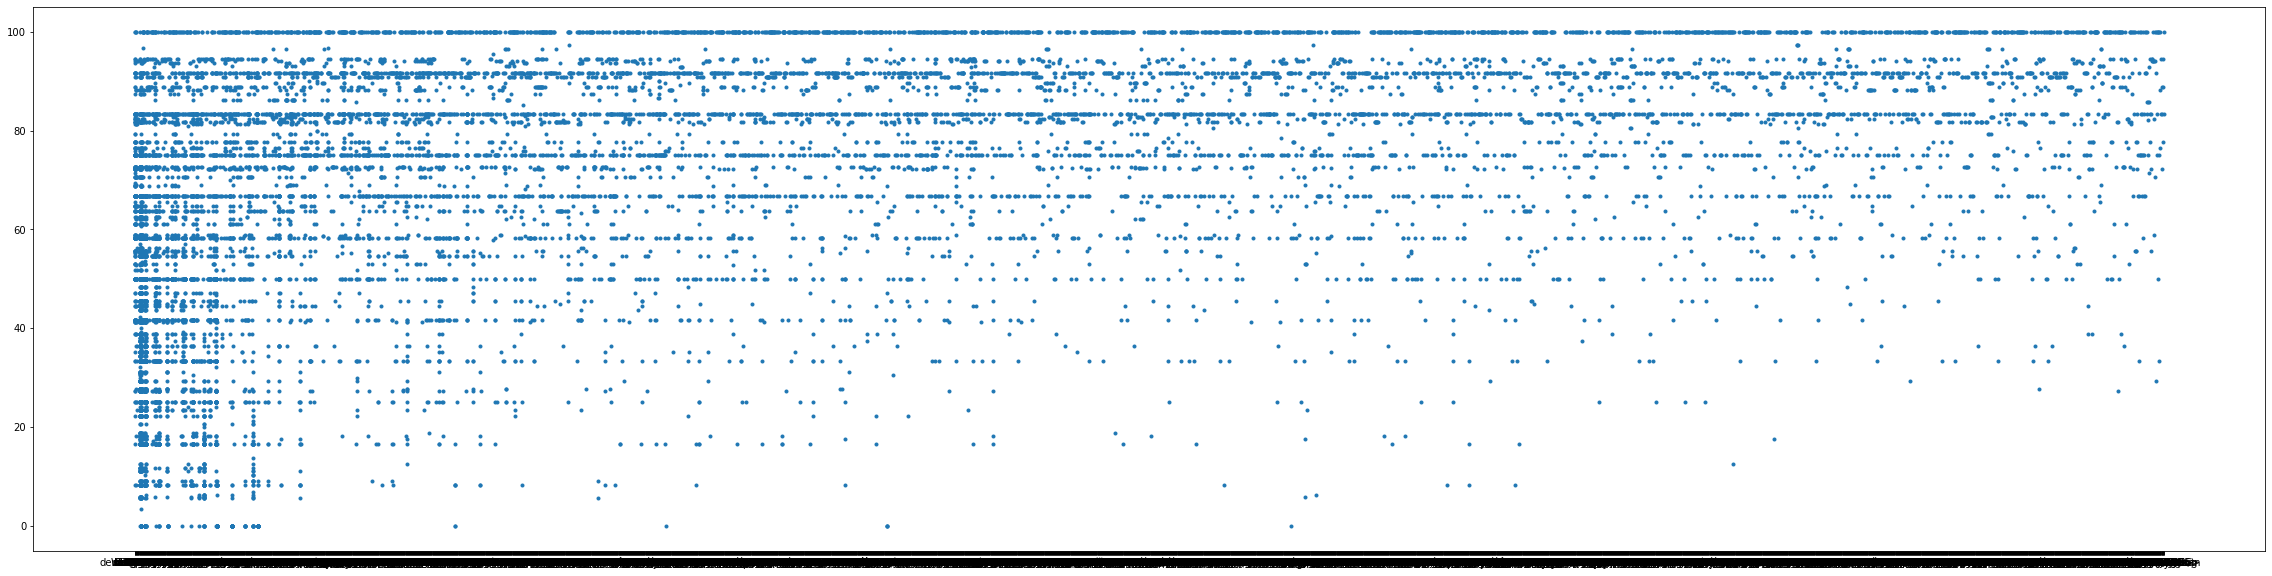

In [17]:
fig, ax = plt.subplots(figsize=(40, 10))
ax.scatter(train['word'],train['fixProp'],marker=".")
plt.show()

In [41]:
# Correlation between variables
train_features.corr()

,nFix,FFD,GPT,TRT,fixProp
nFix,1.000000,0.783180,0.564147,0.972168,0.820295
FFD,0.783180,1.000000,0.562036,0.808892,0.923127
GPT,0.564147,0.562036,1.000000,0.595496,0.509458
TRT,0.972168,0.808892,0.595496,1.000000,0.773608
fixProp,0.820295,0.923127,0.509458,0.773608,1.000000


([<matplotlib.axis.YTick at 0x1c61ebbd2e0>,
 [Text(0, 0, 'nFix'),
  Text(0, 1, 'FFD'),
  Text(0, 2, 'GPT'),
  Text(0, 3, 'TRT'),
  Text(0, 4, 'fixProp')])

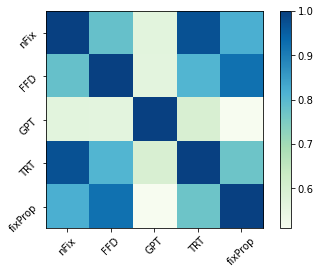

In [44]:
plt.imshow(train_features.corr(),cmap = plt.cm.GnBu , interpolation = 'nearest',data = True)
plt.colorbar()
tick_marks = [i for i in range(len(train_features.columns))]
plt.xticks(tick_marks , train_features.columns,rotation = 45)
plt.yticks(tick_marks , train_features.columns,rotation = 45)

In [8]:
test = pandas.read_csv(r'C:\Users\dell\OneDrive\Desktop\test_true_pred.TXT')
test[['word','nFix','FFD','GPT','TRT','fixProp']]

,word,nFix,FFD,GPT,TRT,fixProp
0,It's,5.747126,1.384927,1.384927,1.783566,33.333333
1,the,14.942529,2.859205,4.398777,4.773360,66.666667
2,funniest,33.333333,3.312829,8.673838,10.175607,100.000000
3,American,36.781609,3.426235,9.340527,10.711708,100.000000
4,comedy,27.586207,3.694285,8.725386,8.660091,91.666667
...,...,...,...,...,...,...
3549,pursued,17.241379,4.412523,7.529468,5.185745,100.000000
3550,a,3.448276,1.030963,1.030963,1.030963,25.000000
3551,career,13.793103,3.113509,3.993264,3.515585,83.333333
3552,in,1.149425,0.254304,0.254304,0.254304,8.333333


In [9]:
for i in range(len(test['word'])):
    if  '.<EOS>' in test['word'][i]:
        test['word'][i] = test['word'][i].replace(".<EOS>","")

<ipython-input-9-2e97b53f7088>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['word'][i] = test['word'][i].replace(".<EOS>","")


In [10]:
test['word']

0           It's
1            the
2       funniest
3       American
4         comedy
          ...   
3549     pursued
3550           a
3551      career
3552          in
3553    politics
Name: word, Length: 3554, dtype: object

In [11]:
data = list(train['word'])
data

['Carlucci',
 'was',
 'deputy',
 'defense',
 'secretary',
 'from',
 '1981',
 'until',
 '1986,',
 'national',
 'security',
 'advisor',
 'from',
 '1986',
 'until',
 '1987,',
 'and',
 'defense',
 'secretary',
 'in',
 '1987,',
 'following',
 'the',
 'resignation',
 'of',
 'Weinberger,',
 'his',
 'nomination',
 'by',
 'President',
 'Ronald',
 'Reagan',
 'and',
 'his',
 'confirmation',
 'in',
 'the',
 'Senate',
 'by',
 'a',
 'vote',
 'of',
 '91',
 'to',
 '1',
 'All',
 'members',
 'of',
 'the',
 'Bouvier',
 'family',
 '(except,',
 'of',
 'course,',
 'Marge)',
 'smoke',
 'heavily',
 'and',
 'have',
 'gruff',
 'voices',
 'and',
 'sarcastic,',
 'snarky',
 'demeanours',
 'Genuinely',
 'touching',
 'because',
 "it's",
 'realistic',
 'about',
 'all',
 'kinds',
 'of',
 'love',
 'Shire',
 'became',
 'famous',
 'for',
 'her',
 'roles',
 'as',
 'the',
 'wife',
 'of',
 'boxer',
 'Rocky',
 'Balboa',
 'in',
 'the',
 'Rocky',
 'movies,',
 'and',
 'for',
 'her',
 'role',
 'in',
 'The',
 'Godfather',
 'and',

In [12]:
test_data = list(test['word'])
test_data

["It's",
 'the',
 'funniest',
 'American',
 'comedy',
 'since',
 'Graffiti',
 'Bridge',
 'For',
 'a',
 'time',
 'in',
 'the',
 'summer',
 'of',
 '1823,',
 'his',
 'expedition',
 'was',
 'joined',
 'by',
 'Italian',
 'explorer',
 'Giacomo',
 'Beltrami',
 'This',
 'method',
 'almost',
 'never',
 'fails',
 'him,',
 'and',
 'it',
 'works',
 'superbly',
 'here',
 'He',
 'was',
 'born',
 'in',
 'Overisel,',
 'Michigan',
 'Despite',
 'the',
 'holes',
 'in',
 'the',
 'story',
 'and',
 'the',
 'somewhat',
 'predictable',
 'plot,',
 'moments',
 'of',
 'the',
 'movie',
 'caused',
 'me',
 'to',
 'jump',
 'in',
 'my',
 'chair..',
 'On',
 'January',
 '28,',
 '2005',
 'it',
 'was',
 'revealed',
 'that',
 'he',
 'accepted',
 'money',
 'from',
 'the',
 'George',
 'W.',
 'Bush',
 'administration',
 'to',
 'promote',
 'their',
 'marriage',
 'initiative',
 'program,',
 'which',
 'he',
 'did',
 'not',
 'disclose',
 'to',
 'his',
 'readers',
 '...',
 'would',
 'be',
 'a',
 'total',
 'loss',
 'if',
 'not',
 

In [13]:
list = []
for i in range(len(data)):
    list.append(data[i])
for i in range(len(test_data)):
    list.append(test_data[i])

In [14]:
list

['Carlucci',
 'was',
 'deputy',
 'defense',
 'secretary',
 'from',
 '1981',
 'until',
 '1986,',
 'national',
 'security',
 'advisor',
 'from',
 '1986',
 'until',
 '1987,',
 'and',
 'defense',
 'secretary',
 'in',
 '1987,',
 'following',
 'the',
 'resignation',
 'of',
 'Weinberger,',
 'his',
 'nomination',
 'by',
 'President',
 'Ronald',
 'Reagan',
 'and',
 'his',
 'confirmation',
 'in',
 'the',
 'Senate',
 'by',
 'a',
 'vote',
 'of',
 '91',
 'to',
 '1',
 'All',
 'members',
 'of',
 'the',
 'Bouvier',
 'family',
 '(except,',
 'of',
 'course,',
 'Marge)',
 'smoke',
 'heavily',
 'and',
 'have',
 'gruff',
 'voices',
 'and',
 'sarcastic,',
 'snarky',
 'demeanours',
 'Genuinely',
 'touching',
 'because',
 "it's",
 'realistic',
 'about',
 'all',
 'kinds',
 'of',
 'love',
 'Shire',
 'became',
 'famous',
 'for',
 'her',
 'roles',
 'as',
 'the',
 'wife',
 'of',
 'boxer',
 'Rocky',
 'Balboa',
 'in',
 'the',
 'Rocky',
 'movies,',
 'and',
 'for',
 'her',
 'role',
 'in',
 'The',
 'Godfather',
 'and',

In [15]:
enc1 = TfidfVectorizer()
p = enc1.fit_transform(list)


In [16]:
X_train = p[:15736]
X_test = p[15736:]

In [28]:
print(X_train)

  (0, 924)	1.0
  (1, 5107)	1.0
  (2, 1424)	1.0
  (3, 1382)	1.0
  (4, 4190)	1.0
  (5, 2087)	1.0
  (6, 180)	1.0
  (7, 4963)	1.0
  (8, 184)	1.0
  (9, 3265)	1.0
  (10, 4194)	1.0
  (11, 335)	1.0
  (12, 2087)	1.0
  (13, 184)	1.0
  (14, 4963)	1.0
  (15, 185)	1.0
  (16, 418)	1.0
  (17, 1382)	1.0
  (18, 4190)	1.0
  (19, 2502)	1.0
  (20, 185)	1.0
  (21, 2022)	1.0
  (22, 4739)	1.0
  (23, 3991)	1.0
  (24, 3392)	1.0
  :	:
  (15713, 2550)	1.0
  (15714, 862)	1.0
  (15715, 2326)	1.0
  (15716, 4520)	1.0
  (15717, 3947)	1.0
  (15718, 2936)	1.0
  (15719, 4739)	1.0
  (15720, 3053)	1.0
  (15721, 2121)	1.0
  (15722, 719)	1.0
  (15723, 111)	0.7396273389876092
  (15723, 192)	0.6730166412668472
  (15724, 5107)	1.0
  (15725, 2376)	1.0
  (15726, 4401)	1.0
  (15727, 4265)	1.0
  (15728, 2622)	1.0
  (15729, 4739)	1.0
  (15730, 3080)	0.7805628915442608
  (15730, 5141)	0.6250772531008166
  (15731, 418)	1.0
  (15732, 3512)	1.0
  (15733, 5176)	1.0
  (15734, 3392)	1.0
  (15735, 2401)	1.0


In [17]:
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
train_features = train[['nFix','FFD','GPT','TRT','fixProp']]
test_features = test[['nFix','FFD','GPT','TRT','fixProp']]

In [19]:
##############################################################################################################################

In [20]:
from sklearn.multioutput import MultiOutputRegressor

In [21]:
#Multi Output Linear Regression Model

In [22]:
from sklearn import linear_model

lin_regr = linear_model.LinearRegression()
lin_reg1 = MultiOutputRegressor(lin_regr).fit(X_train,train_features)

lin_res = lin_reg1.predict(X_test)
lin_res

array([[ 5.16894063,  1.4470329 ,  2.15615779,  1.82225428, 30.94529284],
       [ 8.18946762,  2.05475846,  3.34753935,  2.65246747, 46.60152543],
       [26.33228784,  3.56900729,  7.98527896,  9.28241823, 90.90909098],
       ...,
       [15.7726684 ,  3.40350975,  8.32956836,  5.25971229, 73.80174043],
       [ 5.34278347,  1.48421391,  2.51151992,  1.81000409, 32.24374347],
       [16.45255683,  3.8350936 ,  4.85612881,  5.06982326, 94.22657829]])

In [24]:
dummy_nFix = []
dummy_FFD = []
dummy_GPT = []
dummy_TRT = []
dummy_fixProp = []

for i in range(len(lin_res)):
    dummy_nFix.append(lin_res[i][0])
    dummy_FFD.append(lin_res[i][1])
    dummy_GPT.append(lin_res[i][2])
    dummy_TRT.append(lin_res[i][3])
    dummy_fixProp.append(lin_res[i][4])


e1 = np.mean(np.absolute(test['nFix'] - dummy_nFix))
e2 = np.mean(np.absolute(test['FFD'] - dummy_FFD))
e3 = np.mean(np.absolute(test['GPT'] - dummy_GPT))
e4 = np.mean(np.absolute(test['TRT'] - dummy_TRT))
e5 = np.mean(np.absolute(test['fixProp'] - dummy_fixProp))
e_avg = np.mean([e1,e2,e3,e4,e5])

#MAE
print('##### Linear Regression ######')
print('Mean Absolute Error for nFix: %.2f' % e1 )
print('Mean Absolute Error for FFD: %.2f' % e2 )
print('Mean Absolute Error for GPT: %.2f' % e3 )
print('Mean Absolute Error for TRT: %.2f' % e4 )
print('Mean Absolute Error for fixProp: %.2f' % e5 )
print('------------------------------------------------------------')
print('Average MAE for all features: %.3f' % e_avg )

##### Linear Regression ######
Mean Absolute Error for nFix: 6.89
Mean Absolute Error for FFD: 1.14
Mean Absolute Error for GPT: 3.80
Mean Absolute Error for TRT: 2.62
Mean Absolute Error for fixProp: 21.02
------------------------------------------------------------
Average MAE for all features: 7.093


In [25]:
##############################################################################################################################

In [26]:
#Multi Output Ridge Regression Model

In [35]:
from sklearn.linear_model import Ridge

In [22]:
#Finding best value of alpha
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=241)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 10, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train,train_features)
# summarize
print('Config: %s' % results.best_params_)

Config: {'alpha': 2.54}


In [23]:
ridge_model1 = Ridge(alpha = results.best_params_['alpha'],random_state=241)
ridge_reg1 =  MultiOutputRegressor(ridge_model1).fit(X_train,train_features)
res = ridge_reg1.predict(X_test)
res

array([[ 5.45336197,  1.49566394,  2.2789292 ,  1.92514981, 31.91433404],
       [ 8.24229956,  2.06053372,  3.36625288,  2.6720039 , 46.70487861],
       [20.77532748,  3.68554972,  7.94674553,  7.4107265 , 80.50248931],
       ...,
       [16.60091932,  3.50153387,  8.21140346,  5.67634908, 74.57749889],
       [ 5.43827571,  1.50168987,  2.5477519 ,  1.84420299, 32.55425368],
       [17.44016052,  3.78897652,  6.27184577,  5.81044746, 86.01232113]])

In [33]:
dummy_nFix = []
dummy_FFD = []
dummy_GPT = []
dummy_TRT = []
dummy_fixProp = []

for i in range(len(res)):
    dummy_nFix.append(res[i][0])
    dummy_FFD.append(res[i][1])
    dummy_GPT.append(res[i][2])
    dummy_TRT.append(res[i][3])
    dummy_fixProp.append(res[i][4])


e1 = np.mean(np.absolute(test['nFix'] - dummy_nFix))
e2 = np.mean(np.absolute(test['FFD'] - dummy_FFD))
e3 = np.mean(np.absolute(test['GPT'] - dummy_GPT))
e4 = np.mean(np.absolute(test['TRT'] - dummy_TRT))
e5 = np.mean(np.absolute(test['fixProp'] - dummy_fixProp))
e_avg = np.mean([e1,e2,e3,e4,e5])

#MAE
print('##### Ridge Regression ######')
print('Mean Absolute Error for nFix: %.2f' % e1 )
print('Mean Absolute Error for FFD: %.2f' % e2 )
print('Mean Absolute Error for GPT: %.2f' % e3 )
print('Mean Absolute Error for TRT: %.2f' % e4 )
print('Mean Absolute Error for fixProp: %.2f' % e5 )
print('------------------------------------------------------------')
print('Average MAE for all features: %.3f' % e_avg )

##### Ridge Regression ######
Mean Absolute Error for nFix: 5.36
Mean Absolute Error for FFD: 0.84
Mean Absolute Error for GPT: 3.31
Mean Absolute Error for TRT: 2.07
Mean Absolute Error for fixProp: 15.11
------------------------------------------------------------
Average MAE for all features: 5.340


In [34]:
##############################################################################################################################